In [2]:
%pip install pandas numpy matplotlib seaborn scikit-learn xgboost lightgbm

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached xgboost-3.1.1-py3-none-win_amd64.whl.metadata (2.1 kB)
  Using cached lightgbm-4.6.0-py3-none-win_amd64.whl.metadata (17 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.5-py3-none-any.whl.metadata (5.0 kB)
  Using cached joblib-1.5.2-py3-none-any.whl.metadata (5.6 kB)
  Using cached threadpoolctl-3.6.0-py3-none-any.whl.metadata (13 kB)
   ---------------------------------------- 0.0/11.0 MB ? eta -:--:--
   ------- -------------------------------- 2.1/11.0 MB 10.7 MB/s eta 0:00:01
   --------------- ------------------------ 4.2/11.0 MB 10.5 MB/s eta 0:00:01
   ------------------------ --------------- 6.8/11.0 MB 10.7 MB/s eta 0:00:01
   --------------------------------- ------ 9.2/11.0 MB 11.2 MB/s eta 0:00:01
   ---------------

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import warnings
warnings.filterwarnings('ignore')

# Set style for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [4]:
df = pd.read_csv('Final_data.csv')

In [5]:
df.shape

(20000, 54)

In [6]:
df.head(5)

,Age,Gender,Weight (kg),Height (m),Max_BPM,Avg_BPM,Resting_BPM,Session_Duration (hours),Calories_Burned,Workout_Type,...,cal_from_macros,pct_carbs,protein_per_kg,pct_HRR,pct_maxHR,cal_balance,lean_mass_kg,expected_burn,Burns Calories (per 30 min)_bc,Burns_Calories_Bin
0,34.91,Male,65.27,1.62,188.58,157.65,69.05,1.00,1080.90,Strength,...,2139.59,0.500432,1.624789,0.741237,0.835985,725.10,47.777394,685.1600,7.260425e+19,Medium
1,23.37,Female,56.41,1.55,179.43,131.75,73.18,1.37,1809.91,HIIT,...,1711.65,0.500850,1.514093,0.551247,0.734270,-232.91,40.809803,978.6184,1.020506e+20,High
2,33.20,Female,58.98,1.67,175.04,123.95,54.96,0.91,802.26,Cardio,...,1965.92,0.500610,1.663445,0.574534,0.708124,805.74,44.635580,654.5266,1.079607e+20,High
3,38.69,Female,93.78,1.70,191.21,155.10,50.07,1.10,1450.79,HIIT,...,1627.28,0.499533,0.862017,0.744155,0.811150,1206.21,63.007432,773.6300,8.987921e+19,High
4,45.09,Male,52.42,1.88,193.58,152.88,70.84,1.08,1166.40,Strength,...,2659.23,0.500581,2.538153,0.668405,0.789751,303.60,43.347504,711.4176,5.264685e+19,Low


In [7]:
df.isnull().sum()

Age                               0
Gender                            0
Weight (kg)                       0
Height (m)                        0
Max_BPM                           0
Avg_BPM                           0
Resting_BPM                       0
Session_Duration (hours)          0
Calories_Burned                   0
Workout_Type                      0
Fat_Percentage                    0
Water_Intake (liters)             0
Workout_Frequency (days/week)     0
Experience_Level                  0
BMI                               0
Daily meals frequency             0
Physical exercise                 0
Carbs                             0
Proteins                          0
Fats                              0
Calories                          0
meal_name                         0
meal_type                         0
diet_type                         0
sugar_g                           0
sodium_mg                         0
cholesterol_mg                    0
serving_size_g              

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 54 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             20000 non-null  float64
 1   Gender                          20000 non-null  object 
 2   Weight (kg)                     20000 non-null  float64
 3   Height (m)                      20000 non-null  float64
 4   Max_BPM                         20000 non-null  float64
 5   Avg_BPM                         20000 non-null  float64
 6   Resting_BPM                     20000 non-null  float64
 7   Session_Duration (hours)        20000 non-null  float64
 8   Calories_Burned                 20000 non-null  float64
 9   Workout_Type                    20000 non-null  object 
 10  Fat_Percentage                  20000 non-null  float64
 11  Water_Intake (liters)           20000 non-null  float64
 12  Workout_Frequency (days/week)   

# EXPLORATORY DATA ANALYSIS (EDA)

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,20000.0,3.885145e+01,1.211458e+01,1.800000e+01,2.817000e+01,3.986500e+01,4.963000e+01,5.967000e+01
Weight (kg),20000.0,7.389883e+01,2.117301e+01,3.918000e+01,5.816000e+01,7.000000e+01,8.610000e+01,1.307700e+02
Height (m),20000.0,1.723094e+00,1.270328e-01,1.490000e+00,1.620000e+00,1.710000e+00,1.800000e+00,2.010000e+00
Max_BPM,20000.0,1.798897e+02,1.151081e+01,1.593100e+02,1.700575e+02,1.801400e+02,1.894250e+02,1.996400e+02
Avg_BPM,20000.0,1.437043e+02,1.426769e+01,1.190700e+02,1.312200e+02,1.429900e+02,1.560600e+02,1.698400e+02
Resting_BPM,20000.0,6.219581e+01,7.289351e+00,4.949000e+01,5.596000e+01,6.220000e+01,6.809000e+01,7.450000e+01
Session_Duration (hours),20000.0,1.259446e+00,3.413362e-01,4.900000e-01,1.050000e+00,1.270000e+00,1.460000e+00,2.020000e+00
Calories_Burned,20000.0,1.280110e+03,5.022290e+02,3.231100e+02,9.108000e+02,1.231450e+03,1.553112e+03,2.890820e+03
Fat_Percentage,20000.0,2.610131e+01,4.996160e+00,1.133313e+01,2.238781e+01,2.582250e+01,2.967603e+01,3.500000e+01
Water_Intake (liters),20000.0,2.627486e+00,6.047240e-01,1.460000e+00,2.170000e+00,2.610000e+00,3.120000e+00,3.730000e+00


# Check target variable

In [10]:
# Check target variable
print(f"\nTarget Variable (Calories_Burned):")
print(f"Mean: {df['Calories_Burned'].mean():.2f}")
print(f"Median: {df['Calories_Burned'].median():.2f}")
print(f"Std: {df['Calories_Burned'].std():.2f}")
print(f"Min: {df['Calories_Burned'].min():.2f}")
print(f"Max: {df['Calories_Burned'].max():.2f}")


Target Variable (Calories_Burned):
Mean: 1280.11
Median: 1231.45
Std: 502.23
Min: 323.11
Max: 2890.82


# Visualize target distribution

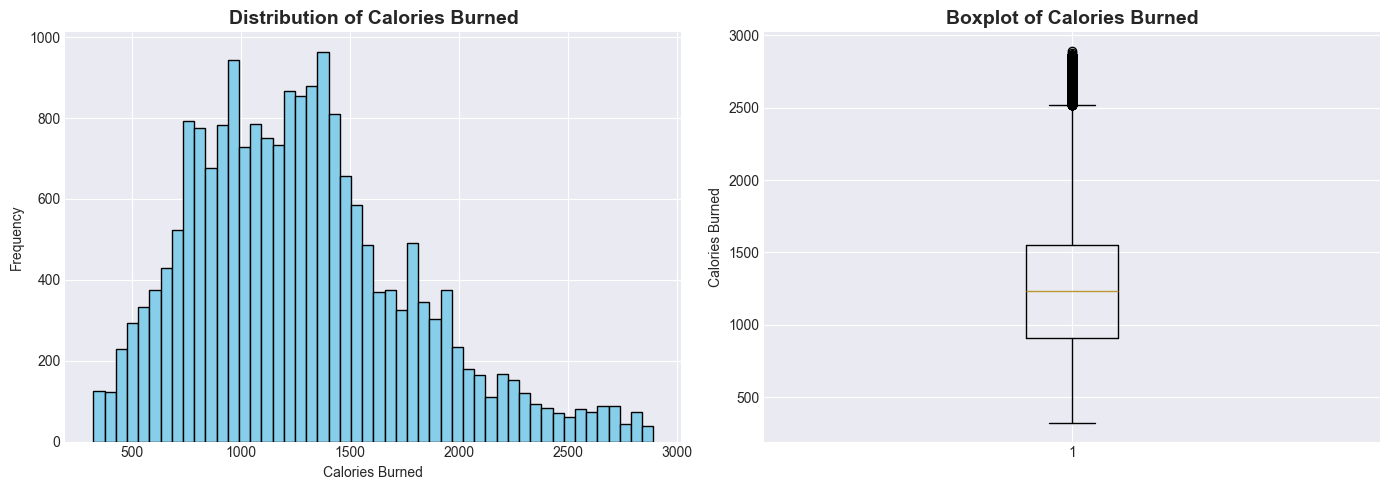

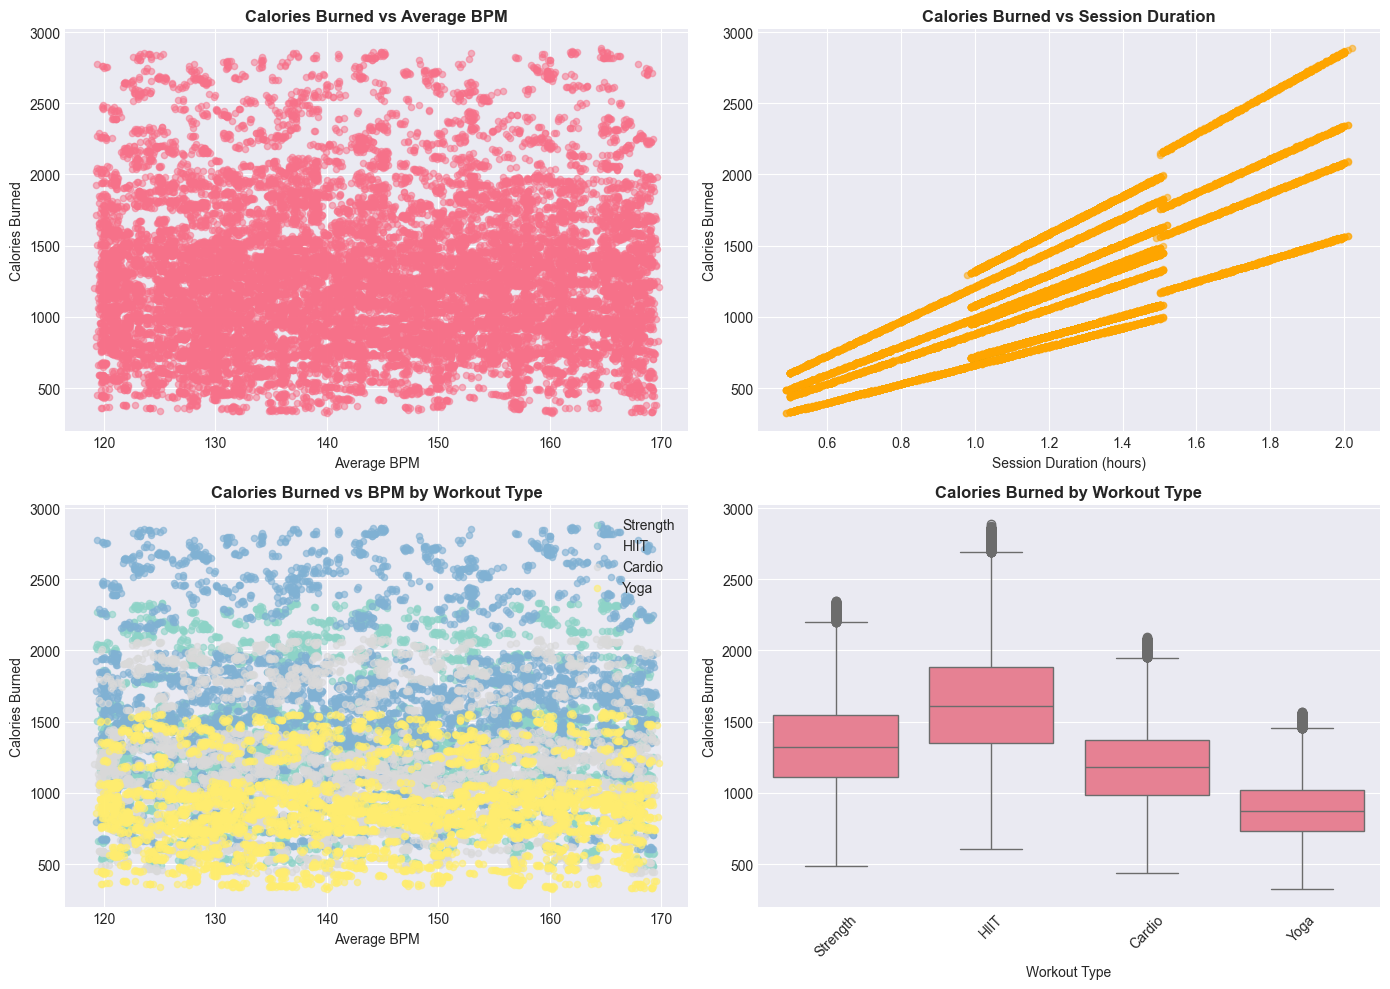

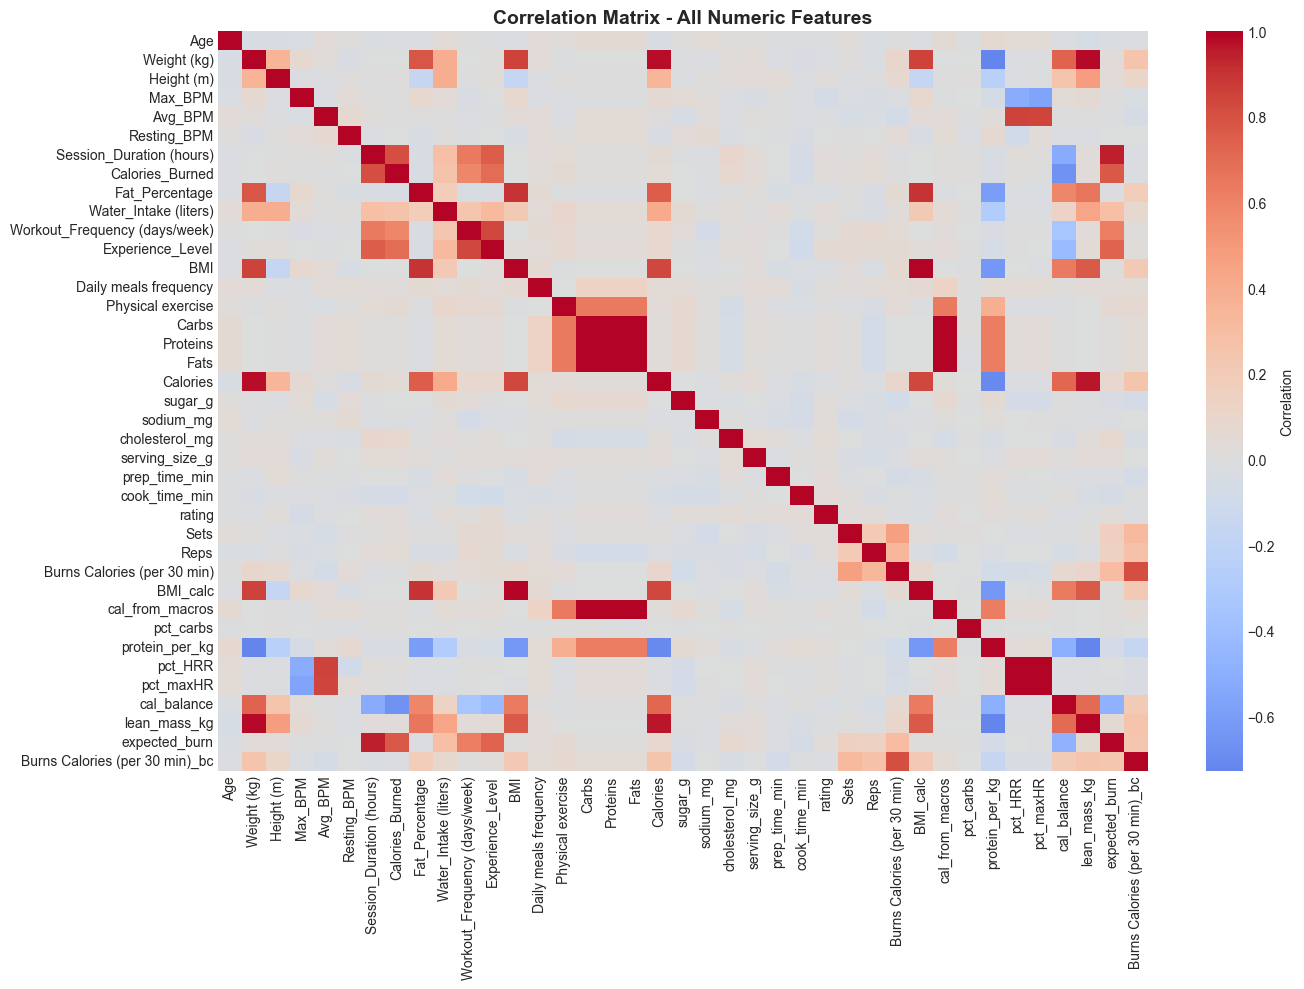


Top 15 Features Correlated with Calories_Burned:
Calories_Burned                  1.000000
Session_Duration (hours)         0.814368
expected_burn                    0.773932
Experience_Level                 0.697116
Workout_Frequency (days/week)    0.582787
Water_Intake (liters)            0.262731
cholesterol_mg                   0.072296
Physical exercise                0.049113
Calories                         0.047981
Reps                             0.043237
serving_size_g                   0.029458
Daily meals frequency            0.028158
rating                           0.025625
Sets                             0.024164
lean_mass_kg                     0.023134
Name: Calories_Burned, dtype: float64


In [11]:
# Visualize target distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df['Calories_Burned'], bins=50, color='skyblue', edgecolor='black')
axes[0].set_title('Distribution of Calories Burned', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Calories Burned')
axes[0].set_ylabel('Frequency')

axes[1].boxplot(df['Calories_Burned'], vert=True)
axes[1].set_title('Boxplot of Calories Burned', fontsize=14, fontweight='bold')
axes[1].set_ylabel('Calories Burned')

plt.tight_layout()
plt.show()

# Analyze relationships with BPM and Workout Type
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

axes[0, 0].scatter(df['Avg_BPM'], df['Calories_Burned'], alpha=0.5, s=20)
axes[0, 0].set_title('Calories Burned vs Average BPM', fontweight='bold')
axes[0, 0].set_xlabel('Average BPM')
axes[0, 0].set_ylabel('Calories Burned')

axes[0, 1].scatter(df['Session_Duration (hours)'], df['Calories_Burned'], alpha=0.5, s=20, color='orange')
axes[0, 1].set_title('Calories Burned vs Session Duration', fontweight='bold')
axes[0, 1].set_xlabel('Session Duration (hours)')
axes[0, 1].set_ylabel('Calories Burned')

workout_types = df['Workout_Type'].unique()
colors = plt.cm.Set3(np.linspace(0, 1, len(workout_types)))
for i, wtype in enumerate(workout_types):
    data = df[df['Workout_Type'] == wtype]
    axes[1, 0].scatter(data['Avg_BPM'], data['Calories_Burned'], 
                       label=wtype, alpha=0.6, s=20, color=colors[i])
axes[1, 0].set_title('Calories Burned vs BPM by Workout Type', fontweight='bold')
axes[1, 0].set_xlabel('Average BPM')
axes[1, 0].set_ylabel('Calories Burned')
axes[1, 0].legend()

sns.boxplot(data=df, x='Workout_Type', y='Calories_Burned', ax=axes[1, 1])
axes[1, 1].set_title('Calories Burned by Workout Type', fontweight='bold')
axes[1, 1].set_xlabel('Workout Type')
axes[1, 1].set_ylabel('Calories Burned')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Correlation analysis
numeric_cols = df.select_dtypes(include=[np.number]).columns
correlation = df[numeric_cols].corr()

fig, ax = plt.subplots(figsize=(14, 10))
sns.heatmap(correlation, annot=False, cmap='coolwarm', center=0, ax=ax, cbar_kws={'label': 'Correlation'})
plt.title('Correlation Matrix - All Numeric Features', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Top correlations with Calories_Burned
cal_correlation = correlation['Calories_Burned'].sort_values(ascending=False)
print("\nTop 15 Features Correlated with Calories_Burned:")
print(cal_correlation.head(15))

# FEATURE ENGINEERING

In [12]:
df_fe = df.copy()

# Heart Rate Zones
def assign_hr_zone(row):
    max_hr = row['Max_BPM']
    avg_hr = row['Avg_BPM']
    
    if avg_hr < (max_hr * 0.5):
        return 'Very Light'
    elif avg_hr < (max_hr * 0.6):
        return 'Light'
    elif avg_hr < (max_hr * 0.7):
        return 'Moderate'
    elif avg_hr < (max_hr * 0.85):
        return 'Hard'
    else:
        return 'Very Hard'

df_fe['HR_Zone'] = df_fe.apply(assign_hr_zone, axis=1)

# BMI Categories
def assign_bmi_category(bmi):
    if bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_fe['BMI_Category'] = df_fe['BMI'].apply(assign_bmi_category)

# Calorie Burn Efficiency (calories per hour)
df_fe['Calorie_Burn_Efficiency'] = df_fe['Calories_Burned'] / (df_fe['Session_Duration (hours)'] + 0.01)

# Heart Rate Reserve
df_fe['Heart_Rate_Reserve'] = df_fe['Max_BPM'] - df_fe['Resting_BPM']

# Workout Intensity (Avg BPM / Max BPM)
df_fe['Workout_Intensity'] = df_fe['Avg_BPM'] / df_fe['Max_BPM']

# Macro Balance Score
df_fe['Macro_Balance'] = np.abs((df_fe['Carbs']/df_fe['Calories']*100 - 50)) + \
                          np.abs((df_fe['Proteins']/df_fe['Calories']*100 - 25)) + \
                          np.abs((df_fe['Fats']/df_fe['Calories']*100 - 25))

print("New features created:")
print("- HR_Zone: Heart rate intensity zones")
print("- BMI_Category: BMI classification")
print("- Calorie_Burn_Efficiency: Calories burned per hour")
print("- Heart_Rate_Reserve: Max HR - Resting HR")
print("- Workout_Intensity: Avg BPM / Max BPM ratio")
print("- Macro_Balance: Nutritional macro balance score")

New features created:
- HR_Zone: Heart rate intensity zones
- BMI_Category: BMI classification
- Calorie_Burn_Efficiency: Calories burned per hour
- Heart_Rate_Reserve: Max HR - Resting HR
- Workout_Intensity: Avg BPM / Max BPM ratio
- Macro_Balance: Nutritional macro balance score


# PREPARE DATA FOR MODELING

In [ ]:
# Select features for modeling
features_to_use = [
    'Age', 'Weight (kg)', 'Height (m)', 'Max_BPM', 'Avg_BPM', 'Resting_BPM',
    'Session_Duration (hours)', 'Fat_Percentage', 'Water_Intake (liters)',
    'Workout_Frequency (days/week)', 'Experience_Level', 'BMI',
    'Daily meals frequency', 'Physical exercise', 'Carbs', 'Proteins', 'Fats',
    'Calories', 'Sets', 'Reps', 'Workout_Intensity', 'Heart_Rate_Reserve',
    'Calorie_Burn_Efficiency', 'Macro_Balance'
]

# Categorical features
categorical_features = ['Gender', 'Workout_Type', 'meal_type', 'diet_type', 
                        'Difficulty Level', 'HR_Zone', 'BMI_Category']

# Prepare X and y
X = df_fe[features_to_use].copy()
y = df_fe['Calories_Burned'].copy()

# Encode categorical variables
label_encoders = {}
X_encoded = X.copy()

for col in categorical_features:
    if col in df_fe.columns:
        le = LabelEncoder()
        X_encoded[col] = le.fit_transform(df_fe[col].astype(str))
        label_encoders[col] = le

X_final = X_encoded.copy()

print(f"\nFeatures for modeling: {len(features_to_use)}")
print(f"Target variable: Calories_Burned")
print(f"Total samples: {len(X_final)}")

# Split data
X_train, X_test, y_train, y_test = train_test_split(X_final, y, test_size=0.2, random_state=42)
print(f"\nTraining set: {len(X_train)}")
print(f"Test set: {len(X_test)}")

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


Features for modeling: 24
Target variable: Calories_Burned
Total samples: 20000

Training set: 16000
Test set: 4000


# MODEL TRAINING & EVALUATION

In [ ]:
results = {}

# 1. Linear Regression
print("\n1. Training Linear Regression...")
lr_model = LinearRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))
mae_lr = mean_absolute_error(y_test, y_pred_lr)

results['Linear Regression'] = {'R²': r2_lr, 'RMSE': rmse_lr, 'MAE': mae_lr}
print(f"   R² Score: {r2_lr:.4f}")
print(f"   RMSE: {rmse_lr:.4f}")
print(f"   MAE: {mae_lr:.4f}")

# 2. Random Forest
print("\n2. Training Random Forest...")
rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1, max_depth=15)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

r2_rf = r2_score(y_test, y_pred_rf)
rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)

results['Random Forest'] = {'R²': r2_rf, 'RMSE': rmse_rf, 'MAE': mae_rf}
print(f"   R² Score: {r2_rf:.4f}")
print(f"   RMSE: {rmse_rf:.4f}")
print(f"   MAE: {mae_rf:.4f}")

# 3. XGBoost
print("\n3. Training XGBoost...")
xgb_model = XGBRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, 
                         random_state=42, verbosity=0)
xgb_model.fit(X_train, y_train)
y_pred_xgb = xgb_model.predict(X_test)

r2_xgb = r2_score(y_test, y_pred_xgb)
rmse_xgb = np.sqrt(mean_squared_error(y_test, y_pred_xgb))
mae_xgb = mean_absolute_error(y_test, y_pred_xgb)

results['XGBoost'] = {'R²': r2_xgb, 'RMSE': rmse_xgb, 'MAE': mae_xgb}
print(f"   R² Score: {r2_xgb:.4f}")
print(f"   RMSE: {rmse_xgb:.4f}")
print(f"   MAE: {mae_xgb:.4f}")

# 4. LightGBM
print("\n4. Training LightGBM...")
lgb_model = LGBMRegressor(n_estimators=100, max_depth=6, learning_rate=0.1, 
                          random_state=42, verbosity=-1)
lgb_model.fit(X_train, y_train)
y_pred_lgb = lgb_model.predict(X_test)

r2_lgb = r2_score(y_test, y_pred_lgb)
rmse_lgb = np.sqrt(mean_squared_error(y_test, y_pred_lgb))
mae_lgb = mean_absolute_error(y_test, y_pred_lgb)

results['LightGBM'] = {'R²': r2_lgb, 'RMSE': rmse_lgb, 'MAE': mae_lgb}
print(f"   R² Score: {r2_lgb:.4f}")
print(f"   RMSE: {rmse_lgb:.4f}")
print(f"   MAE: {mae_lgb:.4f}")


1. Training Linear Regression...
   R² Score: 0.9764
   RMSE: 76.7569
   MAE: 52.1886

2. Training Random Forest...
   R² Score: 0.9999
   RMSE: 4.9115
   MAE: 0.8808

3. Training XGBoost...
   R² Score: 0.9999
   RMSE: 5.0995
   MAE: 2.9272

4. Training LightGBM...
   R² Score: 0.9997
   RMSE: 8.0334
   MAE: 4.9146


# MODEL COMPARISON


                          R²       RMSE        MAE
Linear Regression  0.976375  76.756861  52.188632
Random Forest      0.999903   4.911515   0.880763
XGBoost            0.999896   5.099463   2.927172
LightGBM           0.999741   8.033406   4.914603


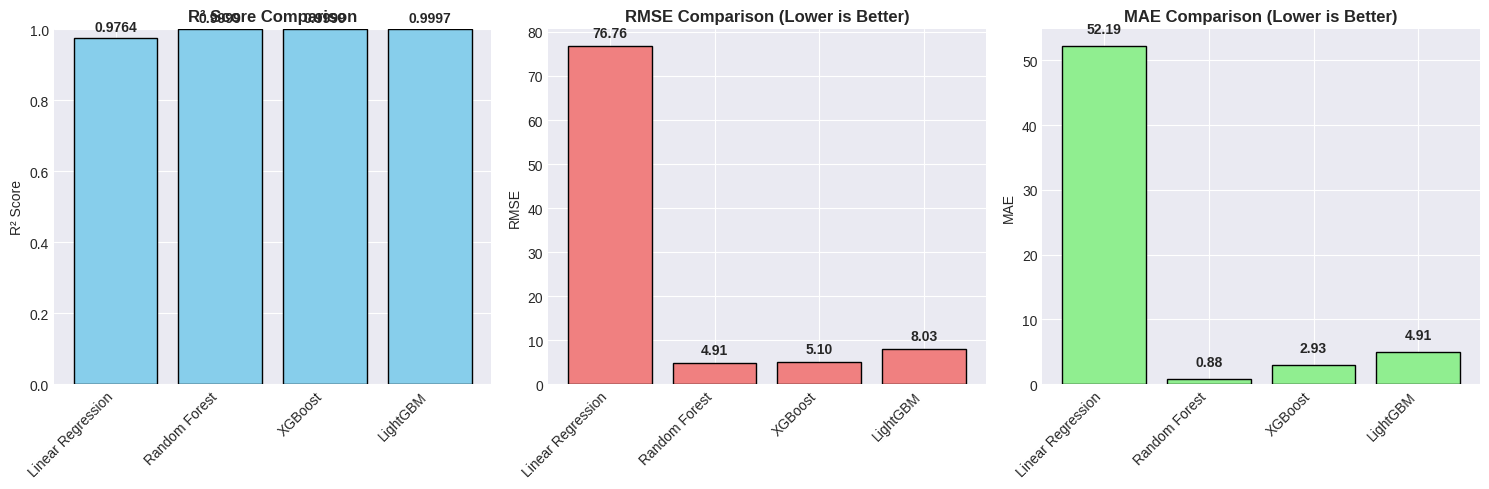

In [ ]:
results_df = pd.DataFrame(results).T
print("\n", results_df)

# Visualize model comparison
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

models = list(results.keys())
r2_scores = [results[m]['R²'] for m in models]
rmse_scores = [results[m]['RMSE'] for m in models]
mae_scores = [results[m]['MAE'] for m in models]

axes[0].bar(models, r2_scores, color='skyblue', edgecolor='black')
axes[0].set_title('R² Score Comparison', fontweight='bold', fontsize=12)
axes[0].set_ylabel('R² Score')
axes[0].set_ylim(0, 1)
for i, v in enumerate(r2_scores):
    axes[0].text(i, v + 0.02, f'{v:.4f}', ha='center', fontweight='bold')
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

axes[1].bar(models, rmse_scores, color='lightcoral', edgecolor='black')
axes[1].set_title('RMSE Comparison (Lower is Better)', fontweight='bold', fontsize=12)
axes[1].set_ylabel('RMSE')
for i, v in enumerate(rmse_scores):
    axes[1].text(i, v + 2, f'{v:.2f}', ha='center', fontweight='bold')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

axes[2].bar(models, mae_scores, color='lightgreen', edgecolor='black')
axes[2].set_title('MAE Comparison (Lower is Better)', fontweight='bold', fontsize=12)
axes[2].set_ylabel('MAE')
for i, v in enumerate(mae_scores):
    axes[2].text(i, v + 2, f'{v:.2f}', ha='center', fontweight='bold')
plt.setp(axes[2].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()


# BEST MODEL ANALYSIS (XGBoost)


Top 15 Most Important Features:
                          Feature  Importance
22        Calorie_Burn_Efficiency    0.663524
6        Session_Duration (hours)    0.330639
10               Experience_Level    0.005250
25                   Workout_Type    0.000116
4                         Avg_BPM    0.000052
9   Workout_Frequency (days/week)    0.000046
12          Daily meals frequency    0.000030
8           Water_Intake (liters)    0.000026
19                           Reps    0.000021
18                           Sets    0.000020
11                            BMI    0.000019
23                  Macro_Balance    0.000019
20              Workout_Intensity    0.000019
13              Physical exercise    0.000018
14                          Carbs    0.000018


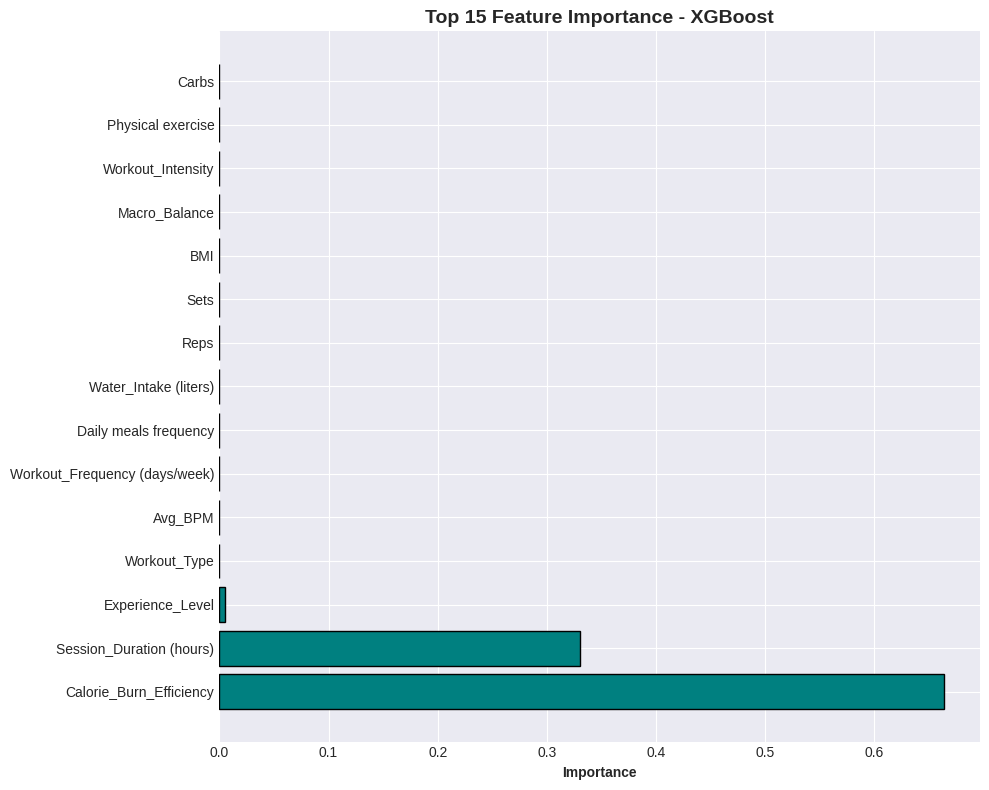

In [ ]:
# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X_final.columns,
    'Importance': xgb_model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\nTop 15 Most Important Features:")
print(feature_importance.head(15))

fig, ax = plt.subplots(figsize=(10, 8))
top_features = feature_importance.head(15)
ax.barh(top_features['Feature'], top_features['Importance'], color='teal', edgecolor='black')
ax.set_xlabel('Importance', fontweight='bold')
ax.set_title('Top 15 Feature Importance - XGBoost', fontweight='bold', fontsize=14)
plt.tight_layout()
plt.show()

# PREDICTIONS VISUALIZATION

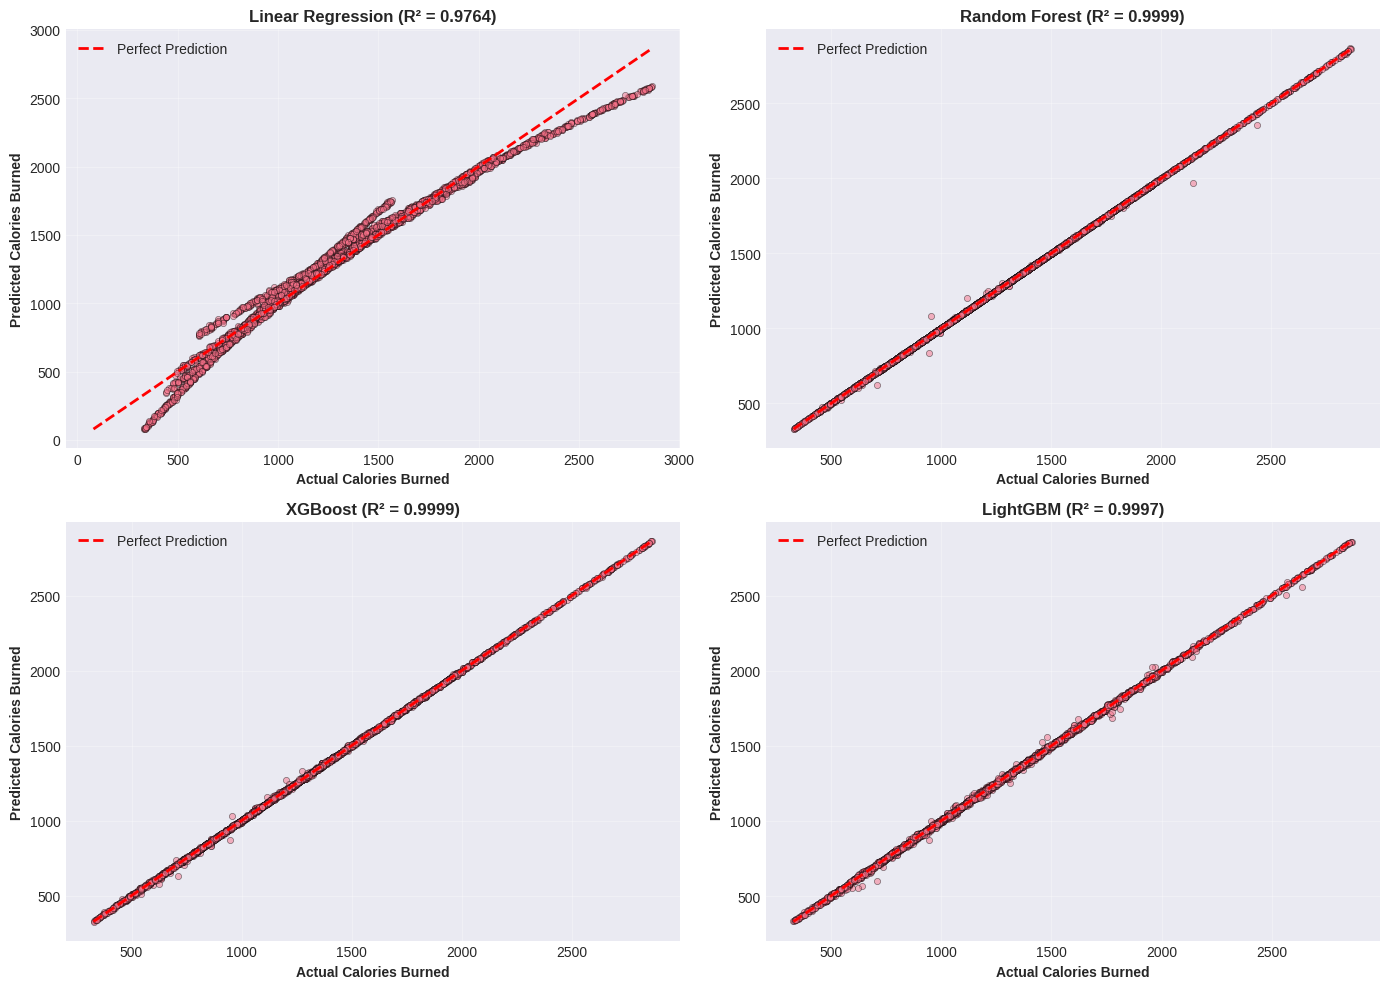

In [ ]:

fig, axes = plt.subplots(2, 2, figsize=(14, 10))

models_pred = [('Linear Regression', y_pred_lr), 
               ('Random Forest', y_pred_rf),
               ('XGBoost', y_pred_xgb),
               ('LightGBM', y_pred_lgb)]

for idx, (name, y_pred) in enumerate(models_pred):
    ax = axes[idx // 2, idx % 2]
    ax.scatter(y_test, y_pred, alpha=0.5, s=20, edgecolors='black', linewidth=0.5)
    
    # Add perfect prediction line
    min_val = min(y_test.min(), y_pred.min())
    max_val = max(y_test.max(), y_pred.max())
    ax.plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect Prediction')
    
    r2 = r2_score(y_test, y_pred)
    ax.set_xlabel('Actual Calories Burned', fontweight='bold')
    ax.set_ylabel('Predicted Calories Burned', fontweight='bold')
    ax.set_title(f'{name} (R² = {r2:.4f})', fontweight='bold', fontsize=12)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# WORKOUT TYPE ANALYSIS


   Workout_Type        R²      RMSE       MAE  Sample_Count
1         HIIT  0.999899  5.322994  2.892189          1023
0     Strength  0.999867  5.182574  3.312905          1007
3         Yoga  0.999858  3.524952  2.244241          1026
2       Cardio  0.999746  6.109583  3.295861           944


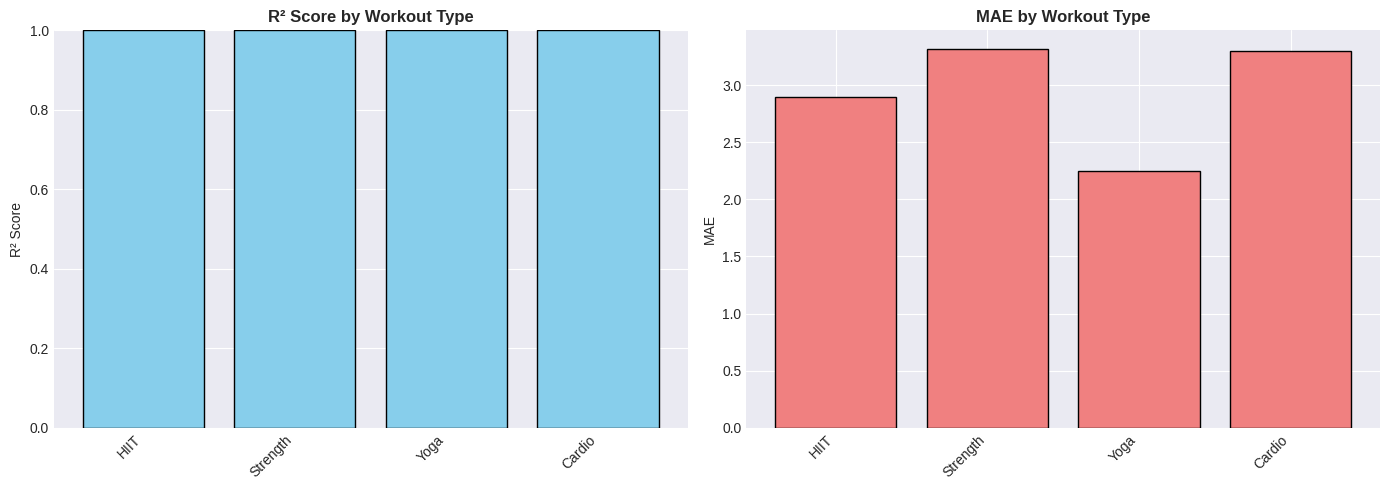

In [ ]:
test_df = X_test.copy()
test_df['Actual'] = y_test.values
test_df['Predicted'] = y_pred_xgb

workout_analysis = []
for wtype in df['Workout_Type'].unique():
    mask = df_fe.loc[X_test.index, 'Workout_Type'] == wtype
    if mask.sum() > 0:
        actual = y_test[mask]
        predicted = y_pred_xgb[mask]
        r2 = r2_score(actual, predicted)
        rmse = np.sqrt(mean_squared_error(actual, predicted))
        mae = mean_absolute_error(actual, predicted)
        
        workout_analysis.append({
            'Workout_Type': wtype,
            'R²': r2,
            'RMSE': rmse,
            'MAE': mae,
            'Sample_Count': mask.sum()
        })

workout_df = pd.DataFrame(workout_analysis).sort_values('R²', ascending=False)
print("\n", workout_df)

fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].bar(workout_df['Workout_Type'], workout_df['R²'], color='skyblue', edgecolor='black')
axes[0].set_title('R² Score by Workout Type', fontweight='bold')
axes[0].set_ylabel('R² Score')
axes[0].set_ylim(0, 1)
plt.setp(axes[0].xaxis.get_majorticklabels(), rotation=45, ha='right')

axes[1].bar(workout_df['Workout_Type'], workout_df['MAE'], color='lightcoral', edgecolor='black')
axes[1].set_title('MAE by Workout Type', fontweight='bold')
axes[1].set_ylabel('MAE')
plt.setp(axes[1].xaxis.get_majorticklabels(), rotation=45, ha='right')

plt.tight_layout()
plt.show()

In [ ]:
# 1. Save Results Summary as CSV
results_summary = pd.DataFrame({
    'Model': ['Linear Regression', 'Random Forest', 'XGBoost', 'LightGBM'],
    'R² Score': [r2_lr, r2_rf, r2_xgb, r2_lgb],
    'RMSE': [rmse_lr, rmse_rf, rmse_xgb, rmse_lgb],
    'MAE': [mae_lr, mae_rf, mae_xgb, mae_lgb]
})
results_summary.to_csv('model_comparison_results.csv', index=False)
print("✓ Saved: model_comparison_results.csv")

# 2. Save Feature Importance
feature_importance.to_csv('feature_importance_xgboost.csv', index=False)
print("✓ Saved: feature_importance_xgboost.csv")

# 3. Save Workout Type Analysis
workout_df.to_csv('workout_type_analysis.csv', index=False)
print("✓ Saved: workout_type_analysis.csv")

# 4. Save Predictions vs Actual
predictions_output = pd.DataFrame({
    'Actual_Calories': y_test.values,
    'Predicted_Calories_XGBoost': y_pred_xgb,
    'Predicted_Calories_RandomForest': y_pred_rf,
    'Predicted_Calories_LightGBM': y_pred_lgb,
    'Error_XGBoost': np.abs(y_test.values - y_pred_xgb),
    'Error_RandomForest': np.abs(y_test.values - y_pred_rf),
    'Error_LightGBM': np.abs(y_test.values - y_pred_lgb)
})
predictions_output.to_csv('predictions_output.csv', index=False)
print("✓ Saved: predictions_output.csv")


✓ Saved: model_comparison_results.csv
✓ Saved: feature_importance_xgboost.csv
✓ Saved: workout_type_analysis.csv
✓ Saved: predictions_output.csv
